In [1]:
%pylab inline
from astropy import constants
from astropy import units
font = {'size':15, 'family':'serif'}
matplotlib.rc('font', **font)
from scipy.special import erf

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


# 3

In [54]:
kb = constants.k_B
m = constants.m_p
Kb = kb.to(units.erg / units.K )
me = constants.m_e
c = constants.c
h = constants.h
print c, kb, me

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Error  = 0.0
  Units  = m / s
  Reference = CODATA 2010   Name   = Boltzmann constant
  Value  = 1.3806488e-23
  Error  = 1.3e-29
  Units  = J / K
  Reference = CODATA 2010   Name   = Electron mass
  Value  = 9.10938291e-31
  Error  = 4e-38
  Units  = kg
  Reference = CODATA 2010


In [4]:
def vdistribution(v):
    T = 6000.0
    factor = (m / (2*np.pi*kb*T))**(3/2.0)
    f = factor * 4*np.pi * v**2 * np.exp(-m.value*v**2/(2*kb.value*T))
    return f

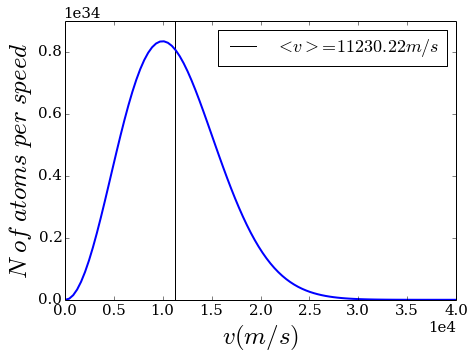

In [7]:
v = np.linspace(0, 40000, 100)
T = 6000.0
figure(figsize=(7, 5))
a = np.sqrt(kb * T / m)
speed = 2*a.value*np.sqrt(2/np.pi)
axvline(speed, c='k', label='$<v>=11230.22 m/s$')
plot(v, vdistribution(v)*1E38, lw=2)
legend()
gca().get_xaxis().get_major_formatter().set_powerlimits((0, 0))
xlabel('$v(m/s)$', fontsize=25)
ylabel('$N\ of\ atoms\ per\ speed\  $', fontsize=25)
savefig('mbv.png', bbox_inches='tight')

In [9]:
speed1p = linspace(speed*0.99, speed*1.01, 112)
Natoms1 = vdistribution(speed1p)*1E38
print sum(Natoms1)
print speed

9.05081374286e+35 K(3/2) kg(3/2) / J(3/2)
11230.2239983


In [46]:
def Natoms(x):
    a = np.sqrt(kb * T / m)
    mu = 2*a * np.sqrt(2/np.pi)
    N = ( erf(x * 2 * 1.01 / (np.sqrt(np.pi))) - ( 4/np.pi) * 1.01 *x   * exp(-1.01*4*x / (np.pi)) ) -  ( erf(x*2*0.99 / (np.sqrt(np.pi))) - (4/np.pi) * 0.99   *x * exp(-0.99*4 *x / (np.pi)) ) 
    return N*1E38

In [53]:
Natoms(1)/Natoms(2)

1.3996465027631095

In [12]:
def doppler(v):
    v = v * units.m / units.s
    f = (1 + v/c)
    return f

In [13]:
d1 = doppler(11230)
print d1

1.00003745925


In [14]:
def velocity(doppler):
    v = (doppler - 1)*c
    return v

In [15]:
velocity(1 + (2*(d1-1)))

<Quantity 22459.99999995049 m / s>

# 4

In [16]:
def nu(L):
    L = L.to(units.m)
    nu = c / L
    return nu

In [17]:
Lmin = 1 * units.mm
Lmax = 100 * units.cm
print nu(Lmin), nu(Lmax) 


2.99792458e+11 1 / s 299792458.0 1 / s


In [18]:
hv = h * nu(Lmin)
print hv

1.98644568327e-22 J


In [19]:
T = 14.3 * units.K
kb * T
#print constants.e

<Quantity 1.974327784e-22 J>

In [20]:
def gaunt_factor(nu):
    gamma = 0.5772
    T = 1E4 * units.K
    nu = nu * units.Hz
    me = constants.m_e
    e = 4.8E-10 * units.Fr
    e = e.to(units.kg**(1/2.0) * units.m**(3/2.0) / (units.s))
    g = np.sqrt(3 ) / (2*np.pi) * (  log(8*kb**3 * T**3 / (np.pi**2 * e**4 * me* nu**2) )  - 5*gamma )
    return  g
    

In [21]:
gaunt_factor(1E9)

<Quantity 5.960985943691944>

In [22]:
e = 4.8E-10 * units.Fr

In [23]:
def Tempe(flux, nu):
    nu = nu * units.MHz
    flux = flux * units.Jansky
    Rsr = 0.6/500.0
    T = flux * c**2 / ( nu**2 * 2.0 * pi * kb  * Rsr**2)
    T = T.to(units.K)
    return T

In [24]:
Tempe(50, 100)

<Quantity 35973.75975554946 K>

In [25]:
def Cfactor():
    e = 4.8E-10 * units.Fr
    e = e.to(units.kg**(1/2.0) * units.m**(3/2.0) / (units.s))
    C = (2 * me / (3*pi*kb) )**(1/2.0) * (4.0*pi*e**6 / (3.0*me**2*c*kb))
    return C

In [26]:
def EM(flux, nu, T):
    T = T* units.K
    C = Cfactor()
    nu = nu * units.MHz
    flux = flux * units.Jansky
    Rsr = 0.6/500.0
    EM = flux * c**2 / (2.0 * pi * kb * Rsr**2 * T**(-1/2.0) *  gaunt_factor(nu.value*1E6)*C)
    EM = EM.to(1/ ( units.m**5))
    return EM

In [27]:
em = EM(300, 1E4,36000)
print em
r = 0.6 * units.pc
n = em / (2*  r)
n = n.to(1/units.cm**6)
print sqrt(n)

4.94583608185e+34 1 / m5
1155.72355198 1 / cm3


In [39]:
e = 4.8E-10 * units.Fr
print e

4.8e-10 Fr


In [41]:
C = Cfactor()

In [43]:
C

<Quantity 1.7649666284538246e-12 K(3/2) kg(3/2) m8 / (J(3/2) s5)>

In [60]:
Nu = 5E49 * units.Hz
alpha = 3E-13 * units.cm**3 / units.s
n0 = 2000 / units.cm**3
Strom_radius = (3*Nu / (4*pi*alpha*n0**2))**(1/3.0)
Strom_radius = Strom_radius.to(units.pc)
print Strom_radius

0.696973347924 pc
